<a href="https://colab.research.google.com/github/vinayprabhu/Colabarama/blob/master/MNIST_into_ImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# http://nbdt.alvinwan.com/demo/#airplane

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
proj_dir='/gdrive/My Drive/Colab Notebooks/MNIST_into_ImageNet'
os.chdir(proj_dir)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()  # For easy reset of notebook state.
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape,x_test.shape)
del x_train

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)




Keras [ships](https://www.tensorflow.org/api_docs/python/tf/keras/applications) with 18 off-the-shelf models:

1. DenseNet121
2. DenseNet169
3. DenseNet201
4. InceptionResNetV2
5. InceptionV3
6. MobileNet
7. MobileNetV2
8. NASNetLarge
9. NASNetMobile
10. ResNet101
11. ResNet101V2
12. ResNet152
13. ResNet152V2
14. ResNet50
15. ResNet50V2
16. VGG16
17. VGG19
18. Xception

```
# 224 x 224 x 3 FAMILY
from keras.applications.resnetimport ResNet50 
from keras.applications.resnetimport ResNet101 
from keras.applications.resnetimport ResNet152 
from keras.applications.resnet_v2import ResNet50V2 
from keras.applications.resnet_v2import ResNet101V2 
from keras.applications.resnet_v2import ResNet152V2 
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.densenet import  DenseNet121
from keras.applications.densenet  import DenseNet169
from keras.applications.densenet  import DenseNet201
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
# 299 x 299 x 3 FAMILY
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
# The 331 x 331 x 3 model
from keras.applications.nasnet import NASNetLarge
```



In [ ]:
# from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.image import resize
import numpy as np

model = Xception(weights='imagenet')

91889664/91884032 [==============================] - 2s 0us/step


In [ ]:
import gc
def colorify_preprocess_mnist(x_input,N_resize=299,color_vec=[1]):
  # Step-1: 3D/RGB-fy the tensor
  X_mnist_resized=resize(np.expand_dims(x_input,3),size=[N_resize,N_resize]).numpy()
  # Step-2: Place the tensors in the appropriate color channel
  X_mnist_resized_colored=np.zeros((x_input.shape[0],N_resize,N_resize,3))
  for c in color_vec:
    X_mnist_resized_colored[:,:,:,c]=X_mnist_resized[:,:,:,0]
  del X_mnist_resized
  gc.collect()
  # Step-3: Place the tensors in the appropriate color channel
  X_mnist_resized_colored_processed=preprocess_input(X_mnist_resized_colored)
  return X_mnist_resized_colored_processed

40960/35363 [==================================] - 0s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

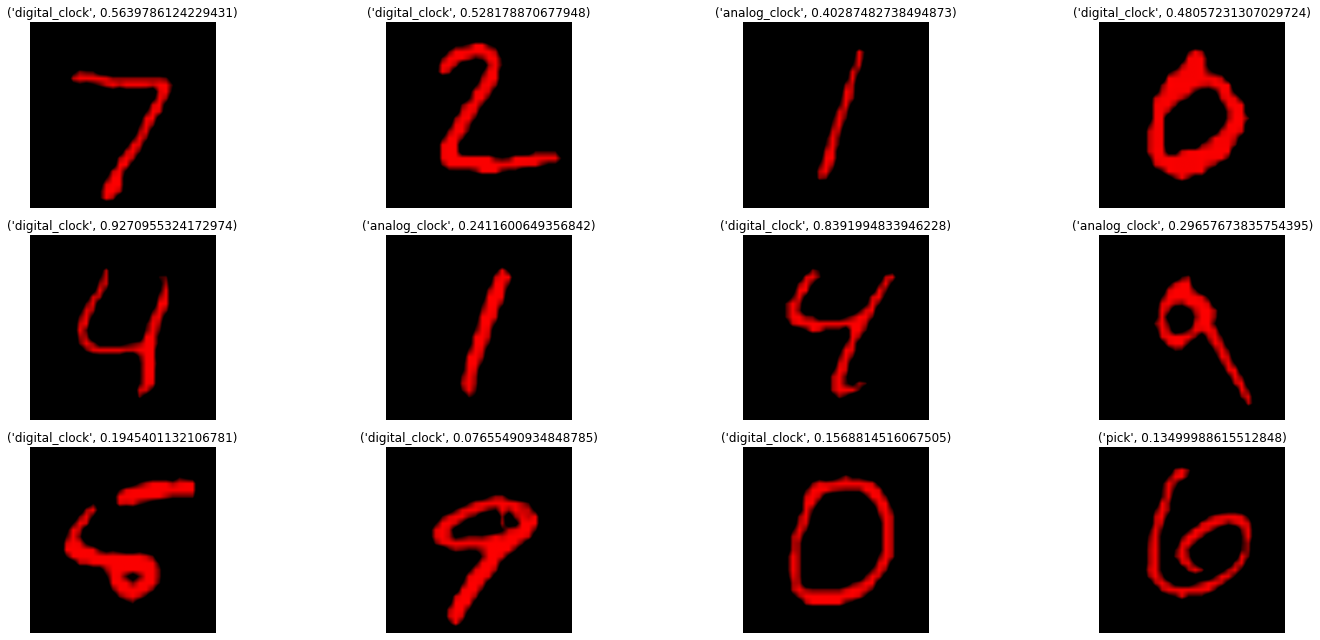

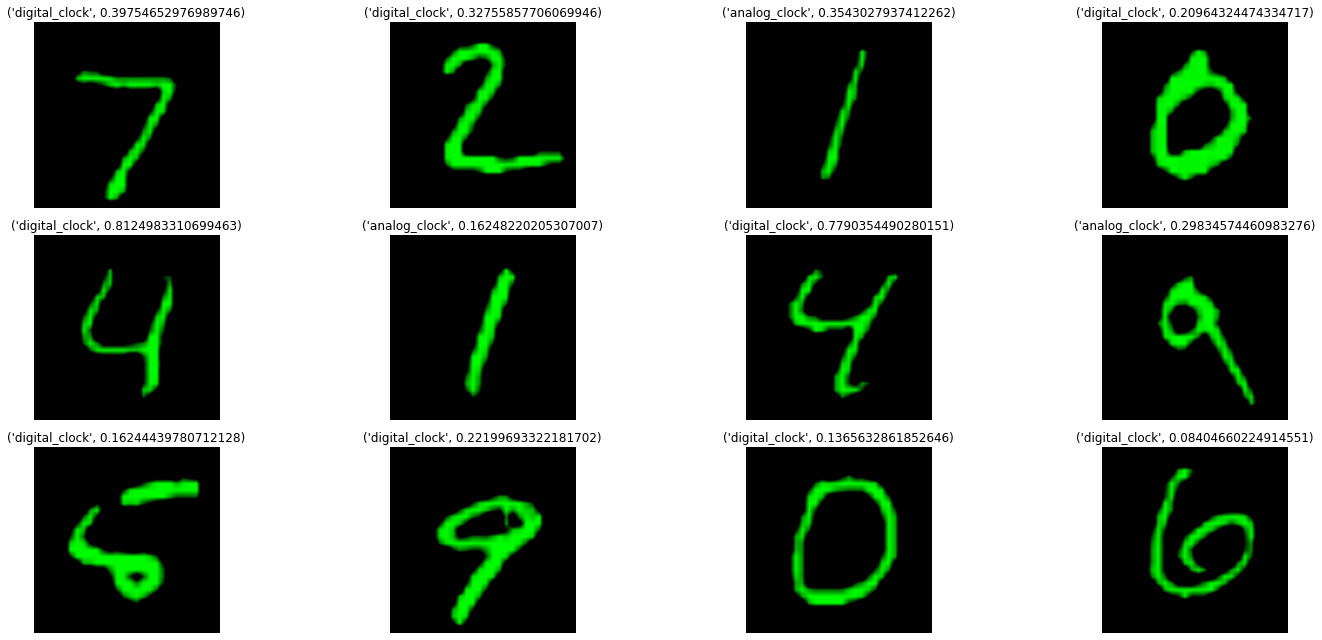

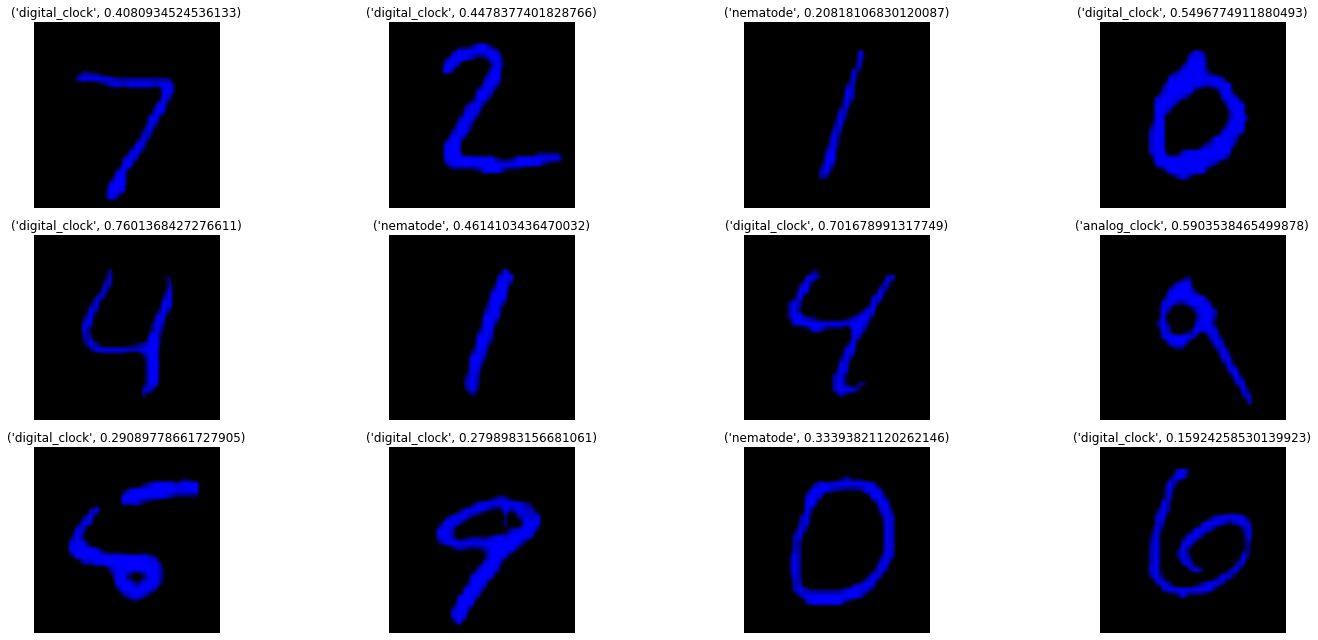

In [ ]:
preds_color=np.zeros((10000,1000,3))
chunk_size=1000
for color_channel in range(3):

  for batch_ind in range(10):
    X_mnist_299_color=colorify_preprocess_mnist(x_test[batch_ind*chunk_size:(batch_ind+1)*chunk_size],color_vec=[color_channel])
    preds_color[batch_ind*chunk_size:(batch_ind+1)*chunk_size,:,color_channel]=model.predict(X_mnist_299_color)
    if(batch_ind==0):
      ## FORM A SMALL TEST PREDICTION SUBSET
      x_12=X_mnist_299_color[0:12]
      # decode the results into a list of tuples (class, description, probability)
      # (one such list for each sample in the batch)
      preds_decoded=decode_predictions(preds_color[0:12,:,color_channel], top=2)
      plt.figure(figsize=(20,9))
      for j in range(12):
        plt.subplot(3,4,j+1)
        plt.imshow(X_mnist_299_color[j])
        plt.title(preds_decoded[j][0][1:3])
        plt.axis('off')
      plt.tight_layout()
    del X_mnist_299_color
    gc.collect()

In [ ]:
np.save('preds_rgb.npy',preds_color)

In [ ]:
import pandas as pd
df_pred=pd.DataFrame(data=np.zeros((10000,3)),columns=['r','g','b'],dtype=int)
df_pred.head()

,r,g,b
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


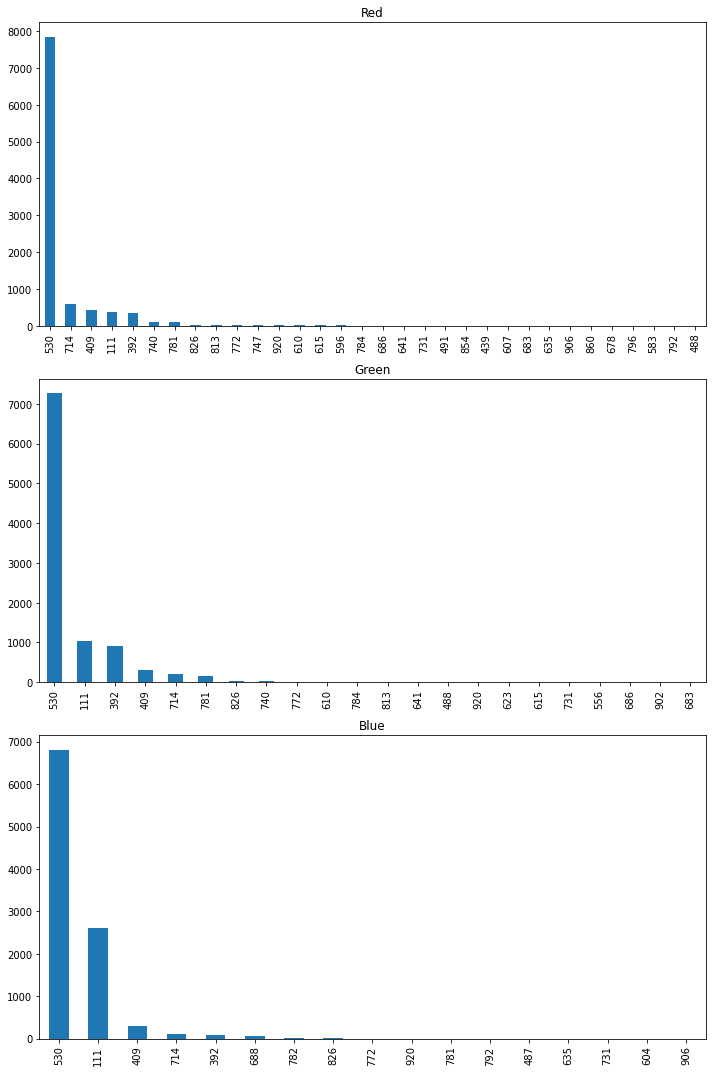

In [ ]:
color_list=['Red','Green','Blue']
plt.figure(figsize=(10,15))
for colr_ind in range(3):
  df_pred.iloc[:,colr_ind]=np.argmax(preds_color[:,:,colr_ind],axis=1)
  plt.subplot(3,1,colr_ind+1)
  df_pred.iloc[:,colr_ind].value_counts().plot(kind='bar')
  plt.title(color_list[colr_ind])
plt.tight_layout()

In [ ]:
df_pred.iloc[:,0].values[y_test==0]

array([530, 530, 530, 530, 530, 530, 530, 530, 111, 530, 530, 530, 530,
       530, 530, 772, 530, 530, 111, 530, 530, 530, 530, 530, 714, 392,
       530, 530, 530, 530, 530, 111, 530, 392, 111, 392, 530, 530, 530,
       530, 530, 530, 111, 111, 530, 530, 530, 111, 111, 714, 111, 530,
       530, 111, 530, 530, 530, 530, 392, 530, 530, 111, 111, 530, 111,
       530, 530, 111, 111, 530, 530, 111, 530, 530, 530, 530, 530, 530,
       111, 714, 530, 530, 530, 111, 530, 530, 111, 111, 530, 111, 530,
       530, 530, 530, 530, 530, 530, 854, 530, 530, 530, 111, 111, 530,
       530, 530, 530, 111, 530, 530, 530, 530, 530, 530, 530, 111, 530,
       530, 530, 530, 530, 714, 714, 530, 111, 392, 530, 714, 530, 530,
       530, 530, 530, 530, 111, 392, 530, 530, 111, 530, 530, 530, 530,
       111, 530, 530, 111, 111, 530, 530, 530, 740, 530, 530, 530, 111,
       111, 111, 111, 111, 530, 530, 530, 530, 530, 530, 530, 111, 530,
       530, 530, 530, 530, 392, 530, 111, 530, 530, 392, 530, 53